In [1]:
import cirq
import numpy as np

from cirq.contrib.svg import SVGCircuit

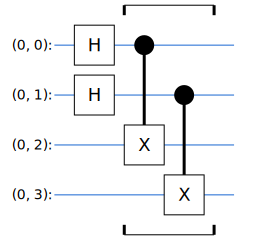

In [2]:
A1, A2, B, C = cirq.GridQubit.rect(1,4)

circuit = cirq.Circuit(
    cirq.H(A1), cirq.CNOT(control=A1, target=B),
    cirq.H(A2), cirq.CNOT(control=A2, target=C)
)


SVGCircuit(circuit)

In [83]:
from qiskit.quantum_info import partial_trace

print(partial_trace(cirq.unitary(circuit), [0, 2]))
print(partial_trace(cirq.unitary(circuit), [1, 3]))

DensityMatrix([[ 1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
               [ 0.+0.j,  1.+0.j,  0.+0.j,  1.+0.j],
               [ 0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j],
               [ 1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j]],
              dims=(2, 2))
DensityMatrix([[ 1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
               [ 0.+0.j,  1.+0.j,  0.+0.j,  1.+0.j],
               [ 0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j],
               [ 1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j]],
              dims=(2, 2))


In [77]:
new_cir = circuit.copy()

# new_cir.append(cirq.H())
# SVGCircuit(new_cir)

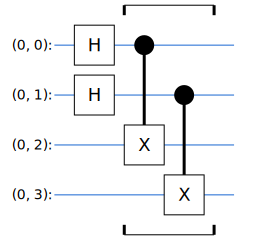

In [82]:
def getCircuit(circuit, classical_bits):
    circuit_copy = circuit.copy()
    
    def operate(circuit, target, bits):
        if bits[0] == '1':
            circuit.append(cirq.Z(target))
        if bits[1] == '1':
            circuit.append(cirq.X(target))
        
        return circuit
    
    operate(circuit_copy, A1, classical_bits[0])
    operate(circuit_copy, A2, classical_bits[1])

    return circuit_copy
    
    
SVGCircuit(circuit)

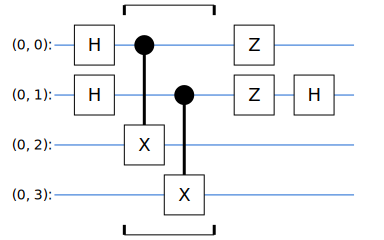

In [81]:
SVGCircuit( getCircuit(circuit, ["10", "11"]) )

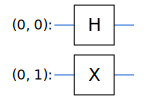

In [125]:
E, F = cirq.GridQubit.rect(1,2)

circuit2 = cirq.Circuit(
    cirq.H(E), cirq.X(F)
)


SVGCircuit(circuit2)

In [107]:
print(cirq.unitary(circuit2))

[[ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [-0.        +0.j  0.70710678+0.j -0.        +0.j -0.70710678+0.j]
 [ 0.70710678+0.j -0.        +0.j -0.70710678+0.j -0.        +0.j]]


In [126]:
target = np.kron([[1,0],[0,0]], cirq.unitary(cirq.H))
target[2,2] = 1
target[2,3] = 1
target[3,2] = 1
target[3,3] = 1
print( target @ cirq.unitary(circuit2))

[[ 0.5       +0.j  0.5       +0.j  0.5       +0.j  0.5       +0.j]
 [-0.5       +0.j  0.5       +0.j -0.5       +0.j  0.5       +0.j]
 [ 0.70710678+0.j  0.70710678+0.j -0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j -0.70710678+0.j -0.70710678+0.j]]


In [108]:
circuit2.append(cirq.H(E))
print(cirq.unitary(circuit2))

[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j  1.+0.j]
 [-0.+0.j  0.+0.j  1.+0.j  0.+0.j]]


In [3]:
def getCircuit(classical_bits):
    """
        getCircuit(circuit, ["01", "10"])
            => X(A1), Z(A2)
    """
    global circuit
    circuit_copy = circuit.copy()
    
    def operate(circuit, target, bits):
        if bits[0] == '1':
            circuit.append(cirq.Z(target))
        if bits[1] == '1':
            circuit.append(cirq.X(target))
        
        return circuit
    
    operate(circuit_copy, A1, classical_bits[0])
    operate(circuit_copy, A2, classical_bits[1])

    return circuit_copy

In [5]:
def buildU(p):
    matrixes = [
        cirq.unitary(cirq.I),cirq.unitary(cirq.X),
        cirq.unitary(cirq.Y),cirq.unitary(cirq.Z)
    ]
    
    U = np.zeros((4,4)).astype('complex128')
    pos = 0
    for i in range(4):
        for j in range(4):
            U += p[pos] * np.kron(matrixes[i], matrixes[j]).astype('complex128')
            pos += 1
            
    from qiskit.extensions import HamiltonianGate
    op = HamiltonianGate(U, 0.1)
    
    return op.to_matrix()

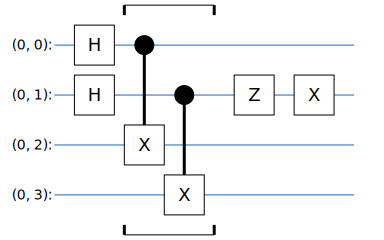

In [31]:
circuit_test = getCircuit(["00", "11"])
SVGCircuit(circuit_test)

In [22]:
params = np.array([ 0.57199973, -0.66686979,  0.09302178,  1.02064739, -1.30309107,
       -0.03772516,  0.9005324 , -0.95523202, -1.03953863,  0.67178943,
        1.05932677, -1.30362216,  1.51618357,  0.29023613,  0.59047519,
       -0.52782317])

In [32]:
circuit_test.append(cirq.ops.MatrixGate(buildU(params))(A1, A2))

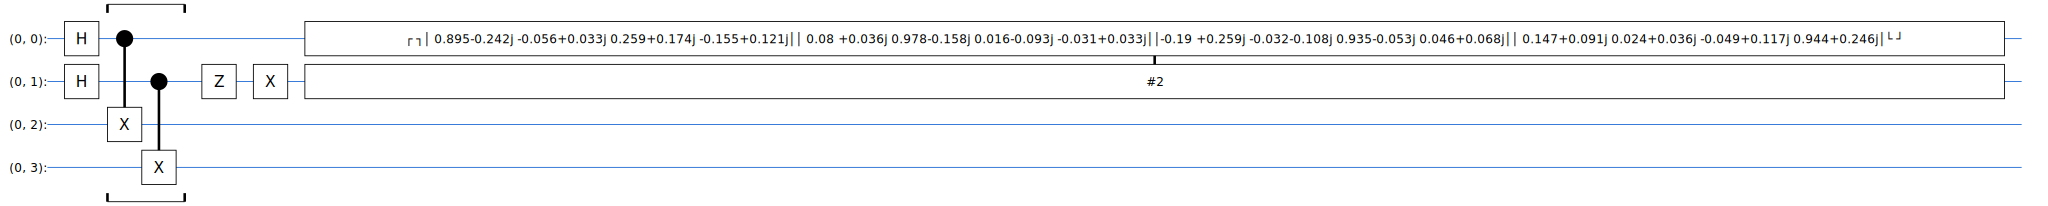

In [33]:
SVGCircuit(circuit_test)

In [34]:
circuit_test.append([cirq.CNOT(control=A1, target=B), cirq.H(A1)])

In [35]:
circuit_test.append([cirq.CNOT(control=A2, target=C), cirq.H(A2)])

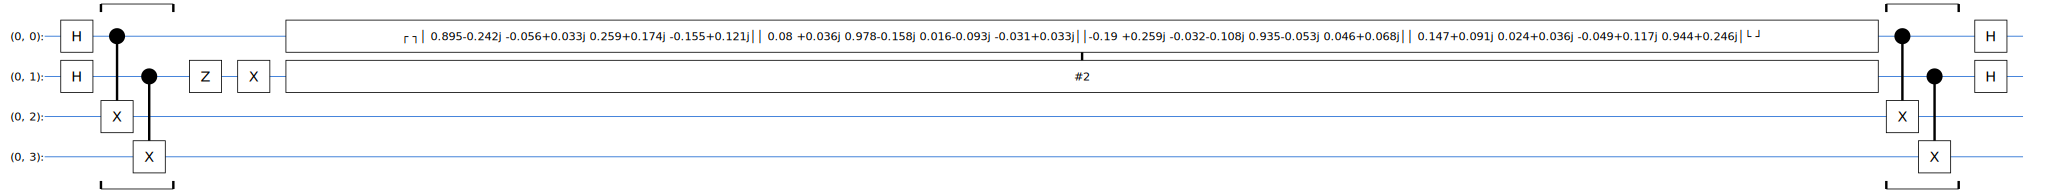

In [36]:
SVGCircuit(circuit_test)

In [37]:
circuit_test.append(cirq.measure(A1, B, key='A1B'))

In [38]:
sim = cirq.Simulator()
output = sim.run(circuit_test, repetitions=1000)
print(output.histogram(key="A1B"))

Counter({0: 889, 3: 57, 1: 29, 2: 25})


In [39]:
circuit_test.append(cirq.measure(A2, C, key='A2C'))

output = sim.run(circuit_test, repetitions=1000)
print(output.histogram(key="A2C"))

Counter({3: 934, 1: 34, 0: 24, 2: 8})
